<h1 align="center">Lab 12: Introduction to Allen Brain Connectivity Atlas Tools</h1>
<p><center>This notebook will introduce you to the Allen Mouse Brain Connectivity Atlas tools and data.</center></p>
<img src='connectivity_website.png', width="500px"/>

<h3 align="center">Estimated Duration: 30 mins</h3>


## Introduction

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
The **Allen Brain Institute for Brain Science** is a non-profit research institute that utilizes big science to understand specific aspects of brain function. The insitute has many publicly available atlases online that provide information on gene expression and neural connectivity. The atlas that we will be working with today is the Mouse Brain Connectivity Atlas, defined as "a brain-wide map of neural projections, including cell class specific data." 

In this part of the lab, we will utilize information from the Mouse Brain Connectivity Atlas to make conclusions regarding structural connectivity and to further explore projection information.
</div>

In [1]:
# Run this cell
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi

%matplotlib inline 
import seaborn as sns

# Activates the API and cache
mcc = MouseConnectivityCache()
structure_tree = mcc.get_structure_tree()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
On this part of the lab, we will start off by showing you how to obtain specific information about individual structures of the brain and the exeriments done on them. In this Section, you will be:

* Using statistical analysis to understand neural projections and connectivity in the **Papez Circuit**

We will start by running the cell below, which sets up all the variables that will be needed throughout the lab.


</div>

## Part 1: The Data 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Running the cell below, you will obtain the data that we will be using in this lab. This data contains a set of experiments done on the Medial Mammillary Nucleus (Structure ID: 502) in wild-type mice. You don't need to worry about what these variables mean, but if you would like to learn more, you can go to [Mouse Connectivity](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/mouse_connectivity.html) for reference.

</div>

In [27]:
summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structure_ids = [item['id'] for item in summary_structures]

experiments = mcc.get_experiments(injection_structure_ids=[502]) 
experiment_set = [exp['id'] for exp in experiments if exp['transgenic_line'] == None]

name_map = structure_tree.get_name_map()

unionizes_set = mcc.get_structure_unionizes(experiment_set,
                                               is_injection = False,
                                                structure_ids = summary_structure_ids,
                                               hemisphere_ids = [3])

## Part 2: Mean, Standard Deviation, Median

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We have now gathered all the information needed to do statistical and data analysis. Our **unionizes_set** DataFrame consists of a list of structures where the Subiculum projects to when it is injected. Some of the columns in this DataFrame that we will be analyzing are:

* projection_density
* projection_volume
* structure_id
</div>

## Part 2.1: Most Projected Structure 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
Let's check to see which structure has the largest projection density. 
    
To do this, we want use the **sort_values** function with the correct column label and order (ascending/descending). Then we obtain the first structure id.
</div>

In [4]:
mystery_id = 491

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Does our result make sense? Write down in the cell below why or why not. **Hint:** Where should the subiculum project to?
</div>

Yes, this makes sense because the subiculum and the medial mammillary nucleus are both part of the papez circuit, in which the subiculum projects to the medial mammillary nucleus.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
Now that we know the structure id and name of where the highest projection density is, let's get a subset of that data. Select the structure ids that are equal to number we found in the previous question. Fill the code below.
</div>

In [5]:
medial_mammillary = unionizes_set[unionizes_set['structure_id'] == mystery_id]
medial_mammillary

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
168,3,633605954,False,1.00000,8090,5860,5300,0.153744,0.092688,507.527245,5475.634588,0.055196,126523791,491,3.957517e+11,486122392.0,2.467204e+11,4.505786e+07,0.5955
441,3,645407479,False,0.60012,8190,6270,5810,0.835991,0.040425,48.220957,1192.838340,0.024073,640285199,491,2.027541e+11,486122392.0,2.344129e+10,1.965169e+07,0.5955
671,3,633558206,False,1.00000,8240,6230,5300,0.298778,0.248148,545.671184,2198.970868,0.147772,127222723,491,3.662006e+11,486122392.0,2.652630e+11,1.206305e+08,0.5955
1206,3,628260905,False,1.00000,8120,6310,5250,1.667512,0.349938,934.721490,2671.104317,0.208388,152994878,491,5.253763e+11,486122392.0,4.543890e+11,1.701128e+08,0.5955
1280,3,633830886,False,1.00000,8240,5970,5350,0.834899,0.446652,2746.234767,6148.483279,0.265981,127795906,491,1.434483e+12,486122392.0,1.335006e+12,2.171277e+08,0.5955


## Part 2.2: Projection Density Distribution

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Let's observe the distribution of values in the Medial Mammilary Nucleus.
</div>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


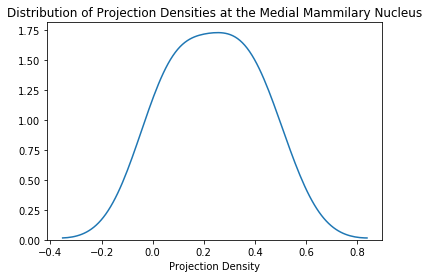

In [6]:
# Run this cell

# Gives us a list of projection_densities in the medial mammilary nucleus
proj_dens = medial_mammillary['projection_density'].values


plt.title('Distribution of Projection Densities at the Medial Mammilary Nucleus')
plt.xlabel("Projection Density")
sns.kdeplot(proj_dens);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Based on this distribution, what do you think the mean, median, and standard deviation is among projection densities at the Medial Mammilary Nuclues? Type your answer in the cell below:
</div>

*Your Answer Here*

## Part 2.3: The Mean, Median and Standard Deviation

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Let's calculate the **mean** of the projection densities at the medial mammillary nucleus.
</div>

In [7]:
sub_mean = sum(proj_dens) / len(proj_dens)
sub_mean

0.23557054765769622

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Find the **median** of the projection densities at the medial mammillary nucleus.
</div>

In [8]:
sub_median = medial_mammillary.sort_values('projection_density', ascending=False)['projection_density'].values[2]
sub_median

0.24814843696811198

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Now find the **standard deviation** of the projection densities at the medial mammillary nucleus.

Recall:

$$\sigma = \sqrt{\sum_{i=1}^N \frac{(x-\mu)^2}{N - 1}}$$

* $\sigma$ = standard deviation
* $x$ = data
* $\mu$ = mean
* $N$ = number of values
</div>

In [9]:
sub_std = np.sqrt(sum((proj_dens - sub_mean)**2) / (len(proj_dens) - 1))
sub_std

0.17050709841601444

## Part 2.4: Average Projection Densities

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Using our statistical analysis, we can observe the average projection densities at the top 20 sites where the subiculum maps to for the 5 wildtype injections.
</div>

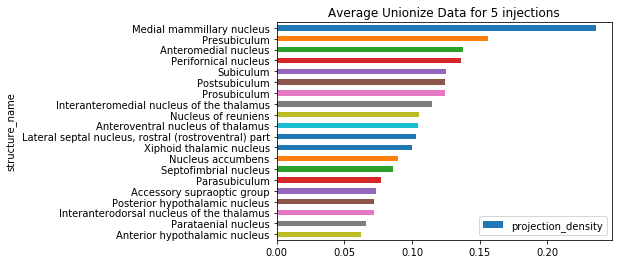

In [12]:
# Run this cell

# We can combine groupby and mean to find the average projection density across experiments for each summary structure
unionizes_set_mean = (unionizes_set.groupby('structure_id', as_index = False)['projection_density'].mean())

# Again, add a column with summary structure acronyms so we can interpret the unionizes more easily
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]
unionizes_set_mean['structure_name'] = names
unionizes_set_mean.sort_values(by = 'projection_density', ascending = False, inplace = True)

# Plot the 20 structures with the highest average projection density across all wild type Subiculum injections
unionizes_set_mean[:20].plot('structure_name', 'projection_density', kind='barh')
plt.gca().invert_yaxis()
plt.title('Average Unionize Data for %i injections'%len(experiment_set));

In [13]:
# look at the data
# re-generate means so they are in the same order as standard deviation
unionizes_set_mean = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].mean())

# generate a second data frame with standard deviations
unionizes_set_std = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].std())

# find names from structure ids
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]

# combine names, mean, and standard deviation into one dataframe for easy plotting
set_mean_std = pd.DataFrame({'structure_name': names, 
                            'mean_projection_density': unionizes_set_mean['projection_density'], 
                            'stdev':  unionizes_set_std['projection_density']
                            })

# sort the dataframe to get the top 20 values on top
set_mean_std.sort_values(by = 'mean_projection_density', ascending = False, inplace = True)

set_mean_std.head()

,structure_name,mean_projection_density,stdev
145,Medial mammillary nucleus,0.235571,0.170507
282,Presubiculum,0.156300,0.164140
35,Anteromedial nucleus,0.137534,0.125943
308,Perifornical nucleus,0.136466,0.101008
146,Subiculum,0.124839,0.083361


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Do your results match those in our visualization and the table above?
</div>

## Part 3: Bootstrap

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

For this part of the lab, we will apply a technique called boostraping to analyze the probability of a structure being a part of a circuit. We will start off with looking at the Primary Visual Cortex since it has more wildtype injections than the subiculum.
</div>

In [14]:
# Run this cell
VISp = structure_tree.get_structures_by_name(["Primary visual area"])
VISp_id = VISp[0]['id']
visual_experiments = mcc.get_experiments(injection_structure_ids=[VISp_id]) 
visual_experiment_set = [exp['id'] for exp in visual_experiments if exp['transgenic_line'] == None]
visual_data = pd.DataFrame(visual_experiment_set)
print('Total number of experiments in the Primary visual area:', len(visual_data))
print('Primary visual area id:', VISp_id)

Total number of experiments in the Primary visual area: 33
Primary visual area id: 385


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In the cell above, we obtain the structure id for the **Primary Visual Area** and filter the number of experiments to wildtype (transgenic line == None). This was the same procedure that was done in the subiculum but condensed into one cell. Try to follow along, but don't focus too much on the code. 

Next, we will obtain a **unionizes_set** similar to the one obtained for the subiculum. The unionizes set is a DataFrame that consists of all of the structures that the Primary visual area projects to for every injection. We named it visual_unionizes_set to differentiate between the earlier unionizes_set.
</div>

In [15]:
visual_unionizes_set = mcc.get_structure_unionizes(visual_experiment_set,
                                               is_injection = False,
                                                structure_ids = summary_structure_ids,
                                               hemisphere_ids = [3])
visual_names = [name_map[strid] for strid in visual_unionizes_set['structure_id']]
visual_unionizes_set['structure_name'] = visual_names
visual_unionizes_set.head()

/anaconda3/lib/python3.7/site-packages/allensdk/api/cache.py:346: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  data = reader(path)


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume,structure_name
0,3,636132166,False,1.000000,9370,2500,9450,0.105844,0.129473,280.100383,2163.396424,0.070242,307297141,312782574,2.717960e+11,442877400.0,1.240501e+11,5.734045e+07,0.542525,Laterointermediate area
1,3,636130952,False,0.176642,3690,3470,6460,0.000097,0.000069,0.029395,424.604137,0.000064,307297141,44,1.842736e+11,759889792.0,2.233689e+07,5.260639e+04,0.930865,Infralimbic area
2,3,636131320,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,246,7.140429e+09,123998400.0,0.000000e+00,0.000000e+00,0.151898,"Midbrain reticular nucleus, retrorubral area"
3,3,636131638,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,460,5.506341e+08,8535600.0,0.000000e+00,0.000000e+00,0.010456,Midbrain trigeminal nucleus
4,3,636132128,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,599626923,4.878733e+08,13030200.0,0.000000e+00,0.000000e+00,0.015962,Subcommissural organ


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In the next cell, we want to obtain the projection densities for the different injections to the Primary visual area that project to the medial mammillary nucleus. We do this in the first line and we name it **mmn** to differentiate from the variable **medial_mammillary**. Next, we arrange the projection densities from biggest to smallest.
</div>

In [16]:
mmn = visual_unionizes_set[visual_unionizes_set['structure_name'] == 'Medial mammillary nucleus']
mmn = mmn['projection_density'].sort_values(ascending=False).values
mmn

array([3.53851879e-01, 5.54855498e-02, 6.99215228e-04, 1.87557598e-04,
       1.59921258e-04, 1.27419001e-04, 1.13553904e-04, 1.05397442e-04,
       8.50623343e-05, 7.62672564e-05, 6.96496052e-05, 5.50569880e-05,
       4.81055549e-05, 3.82561235e-05, 3.21326946e-05, 3.04819335e-05,
       2.96921059e-05, 2.64879792e-05, 1.21357127e-05, 9.85602408e-06,
       9.83749942e-06, 9.46315358e-06, 6.95636149e-06, 6.37881662e-06,
       5.13140928e-06, 2.05455434e-06, 1.48721138e-06, 1.32933310e-06,
       4.21888049e-07, 7.88465769e-08, 2.38114485e-08, 3.44629633e-09,
       0.00000000e+00])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Next, we are going to create a dataframe that we will be able to use for the bootstrapping. 
</div>

In [17]:
mmn_data = {'Medial mammillary nucleus': mmn}
mmn_dataframe = pd.DataFrame(data=mmn_data)
mmn_dataframe.head()

,Medial mammillary nucleus
0,0.353852
1,0.055486
2,0.000699
3,0.000188
4,0.000160


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
The essence of bootstrapping is reliant on a population. In this case, the population is going to be that of the neurons that project to the medial mammillary nucleus from the primary visual area. We obtained a sample, the 33 wildtype experiments from the primary visual area. 

In the cell below, we will resample the samples, which will give us an estimate of the real population distribution, and will give us a "confidence interval" for where the real mean of the population should be. We will do this 5000 times to make sure that our number is big enough for our data to be accurate.
</div>

In [18]:
# Run this cell
means = []
for i in np.arange(5000):
    resampled = mmn_dataframe.sample(n = 33, replace = True)
    mean = resampled.mean()
    means = np.append(means, mean)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We will now graph the resampled means in the histogram below. 
</div>

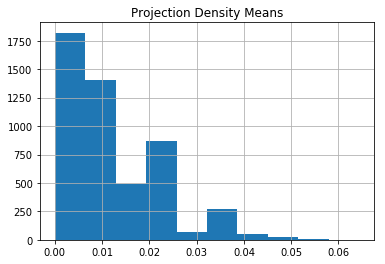

In [19]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Now, let's overlay the mean projection density from the subiculum to the medial mammillary nucleus with the historygram above.
</div>

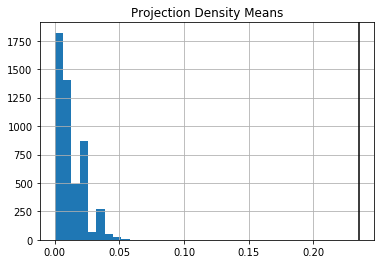

In [20]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.axvline(sub_mean, color = 'k')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
What can we see about the difference in projection density means to the medial mammillary nucleus from the primary visual area and the subiculum?
</div>

*Your answer here*

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
From the histogram above, it is obvious that the mean projection density from the subiculum and the one from the primary visual area do not come from the same underlying population distribution, due to the sharp contrast in numbers. Usually, this analysis would be done using p-values, (which will be included as optional exercises afterwards) but because the contrast is so big, we can skip this step. 

<h3 align="center">What does this mean in terms of connectivity?</h3>

It makes sense that the mean projection density from the subiculum to the medial mammillary nucleus be so high due to this being the connectivity in the Papez circuit. It also makes sense that the mean projection density is so low for the primary visual cortex, due to the fact that this structure is not part of the circuit (even though there is still minimal connectivity).

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Below, we will use the function **quantile** to come up with the 95% interval. This interval says that the true mean of all projection densities from the primary visual area to the medial mammillary nucleus is likely to be between these two values.
</div>

In [21]:
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)
percentile = list(mmn_means.quantile([0.025, 0.975])['Projection Density Means'])
percentile

[4.3343283011022625e-05, 0.03558799887880502]

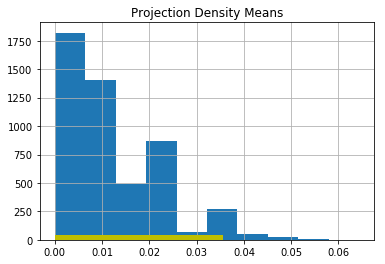

In [22]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.hlines(y=0, xmin=percentile[0], xmax=percentile[1], linewidth=10, color = 'y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Below, we will calculate the ***p-value*** using the above distribution and a made-up mean named **mystery_mean** that will simulate a mean projection density obtained from one of the injections into the primary visual area that projects to the medial mammillary nucleus. We must come up with a null hypothesis and an alternative hypothesis in oder to use the p-value.

***Null hypothesis:*** The mystery_mean comes from the same underlying distribution as that of the medial mammilary nucleus. 

***Alternative hypothesis:*** The mystery_mean does not come from the same underlying distribution, and any correlation is purely due to chance. 

</div>

In [23]:
# Run this cell
mystery_mean = 0.0434
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)

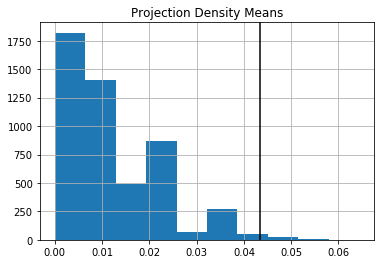

In [24]:
mmn_means.hist()
plt.axvline(mystery_mean, color = 'k')

In [25]:
p_value = np.average(mmn_means > mystery_mean)
p_value

0.0122

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Since the p_value is less than 0.05 (chosen by convention), we can reject the null hypothesis. This means that our mystery_mean did not come from the same underlying distribution as the means from the primary visual area, so we can assume that our mystery_mean is not coming from the primary visual area.

</div>

## Conclusion

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We hoped that this lab served as a good introductions to the tools and the statistical analysis used in neuroinformatics. Neuroinformatics is a growing field and every year, new techniques are being invented for collection of large neural information. Because of this, it is important to know how to analyze and manipulate this data. 

If you liked the lab and would like to further your data science techniques, below are some introductary courses that may interest you:

***Data 8: The Foundations of Data Science***

***Data 100: Principles and Techniques of Data Science***

***Prob 140: Probability for Data Science***
</div>